# Ironkaggle
Natanael Santiago Morales

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Loading Data

In [2]:
# Load the data
sales = pd.read_csv('data/sales.csv')

## Data Exploration

We begin the data exploration section by checking the first rows of the dataset. We want to know how the data set looks, what columns it contains, and get some information about it, using the `head()` method.

Then, we will check the data types of the columns and the number of missing values in each column using the `info()` method.

Finally, we will check the statistical summary of the dataset using the `describe()` method.

In [27]:
display(sales.head())
display(sales.info())
display(sales.describe())

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


None

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


We can see that there are null values in the dataset, and the only data types are integers and 'objects' (strings in this case). Apparently, some of the columns are categorical, since the only possible values are 1 or 0, like the `open`, `promotion`, and `school_holiday` columns, but we will check if there are other categorical columns.

We will check the unique values of the columns to see if there are categorical columns with more than two unique values.

In [3]:
for i in sales.columns:
    print(i, sales[i].nunique())

print("\nSome categorical cols")
for i in sales.columns:
    if i== 'day_of_week' or i == 'open' or i == 'promotion' or i == 'state_holiday' or i =='school_holiday':
        print(sales[i].value_counts())
        print()

Unnamed: 0 640840
store_ID 1115
day_of_week 7
date 942
nb_customers_on_day 3886
open 2
promotion 2
state_holiday 4
school_holiday 2
sales 20129

Some categorical cols
day_of_week
5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: count, dtype: int64

open
1    532016
0    108824
Name: count, dtype: int64

promotion
0    396220
1    244620
Name: count, dtype: int64

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

school_holiday
0    526468
1    114372
Name: count, dtype: int64



After checking the unique values in each column, we get further information about the dataset.
|Column name | Description | Categorical or Continuous|
|------------|-------------|--------------------------| 
|**Unnamed: 0**| Looks like an index/id column for each row, since it has unique values for each row. We will probably drop this column.| indexes|
|**store_id**|This column has 1115 unique values, which means that there are 1115 different stores in the dataset. Useful for visualizing the data, but should it be dropped for the ML model? | Categorical |
| **day_of_week**| This column has 7 unique values, 1 for each day of the week. Useful for visualizing the data|Categorical |
| **date**| This column has 942 unique values, which means that there are 942 different dates in the dataset. There are more rows than dates, so, of course, the dataset holds information for sales of different stores on the same date. (Should this column be dropped?).| dates...|
| **nb_customers_on_day**| Its the numbers of customers on given day.|**Continuous**|
| **open**| This column has 2 unique values. 0 and 1| Categorical |
| **promotion**| This column has 2 unique values. 0 and 1|Categorical|
| **state_holiday**| The column has 4 values. 0, a, b, c. I will assume that 0 means that it was not a state holiday, and the rest were a different type of state holiday|Categorical|
| **school_holiday**| This column has 2 unique values. 0 and 1 |Categorical|
| **sales**| This is the target variable. |**Continuous**|

Now we will visualize the data to get a better understanding of the dataset.

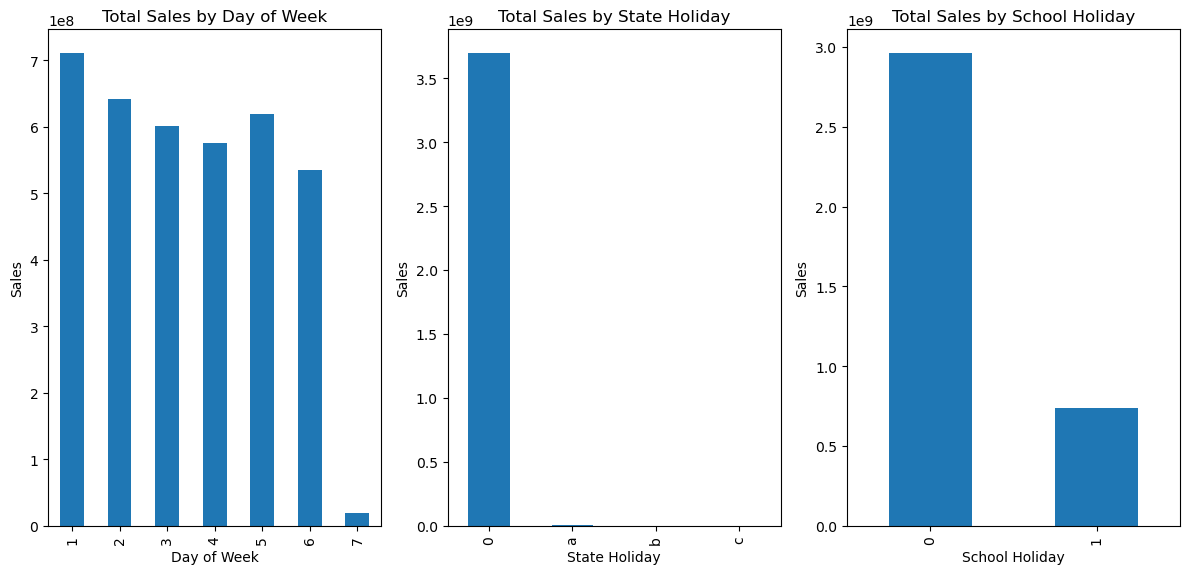

In [29]:
# Data visualization

plt.figure(figsize=(15, 6))
#sales by store id

plt.subplot(1, 3, 1)
store_sales = sales.groupby('day_of_week')['sales'].sum()
store_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Day of Week')
plt.ylabel('Sales')
plt.xlabel('Day of Week')

plt.subplot(1, 3, 2)
state_holiday_sales = sales.groupby('state_holiday')['sales'].sum()
state_holiday_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by State Holiday')
plt.ylabel('Sales')
plt.xlabel('State Holiday')

plt.subplot(1, 3, 3)
school_holiday_sales = sales.groupby('school_holiday')['sales'].sum()
school_holiday_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by School Holiday')
plt.ylabel('Sales')
plt.xlabel('School Holiday')

plt.tight_layout()

plt.show()

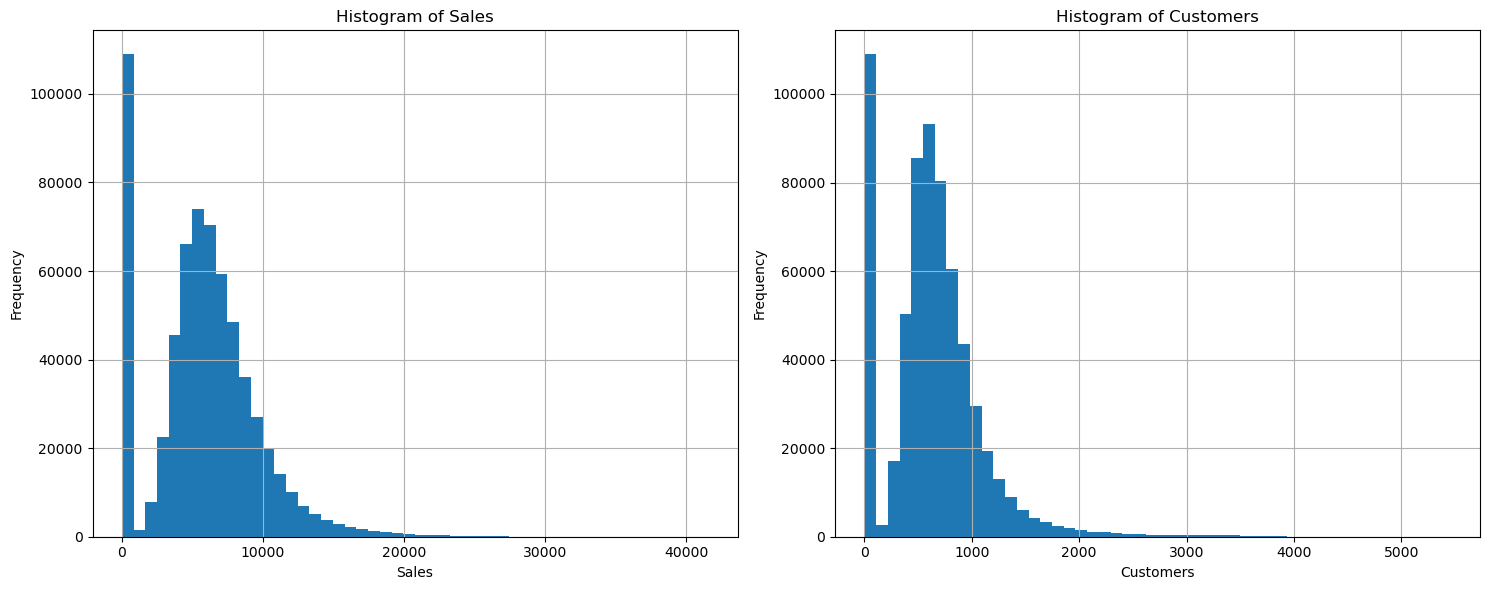

In [30]:
# hsitogram of sales and nb of customers
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sales['sales'].hist(bins=50)
plt.title('Histogram of Sales')
plt.ylabel('Frequency')
plt.xlabel('Sales')

plt.subplot(1, 2, 2)
sales['nb_customers_on_day'].hist(bins=50)
plt.title('Histogram of Customers')
plt.ylabel('Frequency')
plt.xlabel('Customers')

plt.tight_layout()
plt.show()

Next, we will check the distribution of the target variable, `sales`, vs the dates using a barchart. The dates are separated by weeks, and the chart was done in Tableau.


![Histogram](img/histogram.png)

To check if there is collinearity between the columns, we will plot a correlation matrix.

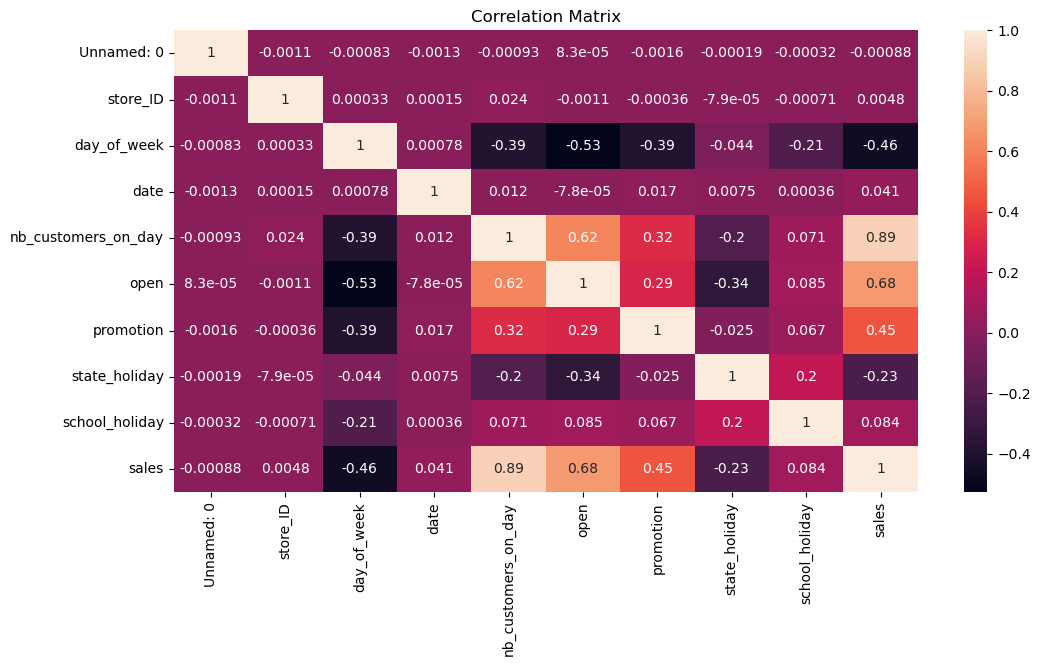

In [31]:
# change `date` to datetime
sales['date'] = pd.to_datetime(sales['date'])

# change `state_holiday` strings from 0,a,b,c to ints 0,1,2,3
sales['state_holiday'] = sales['state_holiday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})

#corr
corr = sales.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

The only continuous variables in the dataset are the `nb_customers_on_day` and `sales` columns. We will plot a pair plot to see the relationship between the continuous variable and the target variable.

The pairplot shows that there is a positive correlation between the number of customers on a given day and the sales. This is expected since the more customers there are, the more sales there will be.

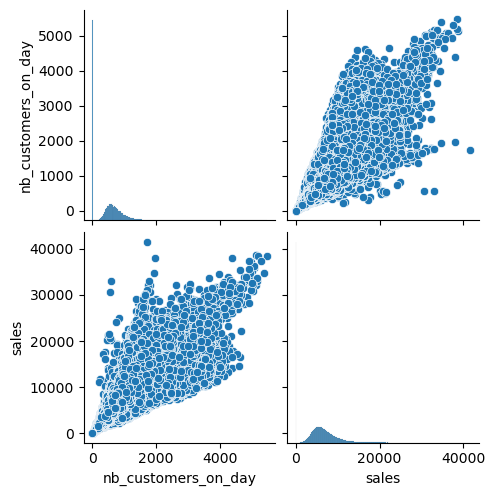

In [32]:
# pairplot between nb_customers_on_day and sales
sns.pairplot(sales[['nb_customers_on_day', 'sales']])
plt.show()


Finally, we will check if there are any outliers

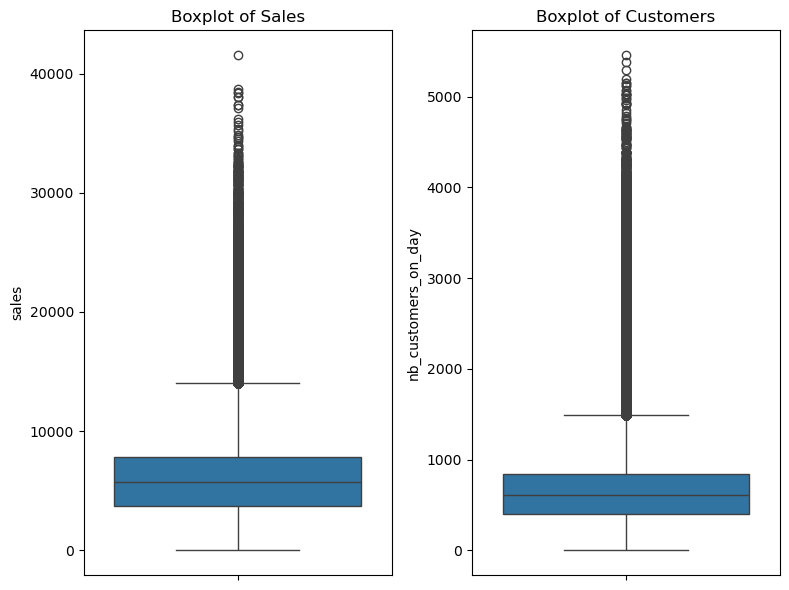

In [33]:
# check for outliers
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.boxplot(sales['sales'])
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(sales['nb_customers_on_day'])
plt.title('Boxplot of Customers')

plt.tight_layout()
plt.show()

In [34]:
Q1_sales = sales['sales'].quantile(0.25)
Q3_sales = sales['sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
outliers_sales = sales[(sales['sales'] < (Q1_sales - 1.5 * IQR_sales)) | (sales['sales'] > (Q3_sales + 1.5 * IQR_sales))]
outliers_sales_percentage = (outliers_sales.shape[0]/sales.shape[0])*100
print(f"sales outliers: {outliers_sales.shape[0]:,} ({outliers_sales_percentage:.2f}%)")

Q1_customers = sales['nb_customers_on_day'].quantile(0.25)
Q3_customers = sales['nb_customers_on_day'].quantile(0.75)
IQR_customers = Q3_customers - Q1_customers
outliers_customers = sales[(sales['nb_customers_on_day'] < (Q1_customers - 1.5 * IQR_customers)) | (sales['nb_customers_on_day'] > (Q3_customers + 1.5 * IQR_customers))]
outliers_customers_percentage = (outliers_customers.shape[0]/sales.shape[0])*100
print(f"customers outliers: {outliers_customers.shape[0]:,} ({outliers_customers_percentage:.2f}%)")

sales outliers: 16,821 (2.62%)
customers outliers: 23,941 (3.74%)


In [35]:
sales.drop('date', axis=1).skew()

Unnamed: 0             0.000469
store_ID              -0.001089
day_of_week           -0.000169
nb_customers_on_day    1.588481
open                  -1.758789
promotion              0.486952
state_holiday          7.445381
school_holiday         1.679398
sales                  0.642366
dtype: float64

Even though the sales and the number of customers have some "outliers", we will not remove them since they are part of the data and can be useful for the model. They depend on other data, and of course, if there is a holiday and sales discount, the sales will be higher as well as the number of customers on that day.

The skewness of numerical data was checked, but the maximum skewness of the two numerical columns (`sales` and `nb_customers_on_day`) is 0.64 and 1.59, respectively. This is not a high skewness value, so we will not apply any transformation to the data.

## Data Preprocessing

We begin by dropping the `Unnamed: 0` column since it is an index column and does not provide any useful information for the model. I will also remove the `date` column and will change the categorical columns `state_holiday` and `day_of_week` to dummy variables using the `get_dummies()` method.

In [4]:
# drop unnecessary columns
sales = sales.drop(['Unnamed: 0', 'date'], axis=1)

sales = pd.get_dummies(sales, columns=['state_holiday', 'day_of_week'], drop_first=True, dtype=int)
sales.head()


,store_ID,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,366,517,1,0,0,4422,0,0,0,0,0,1,0,0,0
1,394,694,1,0,0,8297,0,0,0,0,0,0,0,1,0
2,807,970,1,1,0,9729,0,0,0,0,0,1,0,0,0
3,802,473,1,1,0,6513,0,0,0,1,0,0,0,0,0
4,726,1068,1,1,0,10882,0,0,0,0,0,1,0,0,0


Now the data is mostly numerical, except for the store_id column. If we will make some other column using metrics, we need to ensure we only use the training data to calculate it and avoid data leakage. Since the store id is categorical and there are 1115 different values, I will not one-hot encode them. That would result on the data set having 1114 more columns. Instead, I will add a new column using the store id frequency, and the percentage of persons that bought something on that store on that day with respect to the total customers

In [5]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(sales.drop('sales', axis=1), sales['sales'], test_size=0.2, random_state=42)

In [6]:
# create new feature `weighted_factor` to substitute the store_id
store_customers = (X_train.groupby('store_ID')['nb_customers_on_day'].sum()/(X_train['nb_customers_on_day'].sum()))
store_occurrence = X_train['store_ID'].value_counts().sort_index()
weighted_factor = store_customers * store_occurrence

# Insert the new feature into training the dataset
X_train['weighted_factor'] = X_train['store_ID'].map(weighted_factor)
# drop the store_id
X_train = X_train.drop('store_ID', axis=1)

# insert the new feature into the test dataset
X_test['weighted_factor'] = X_test['store_ID'].map(weighted_factor)
# drop the store_id
X_test = X_test.drop('store_ID', axis=1)

In [8]:
weighted_factor.shape

(1115,)

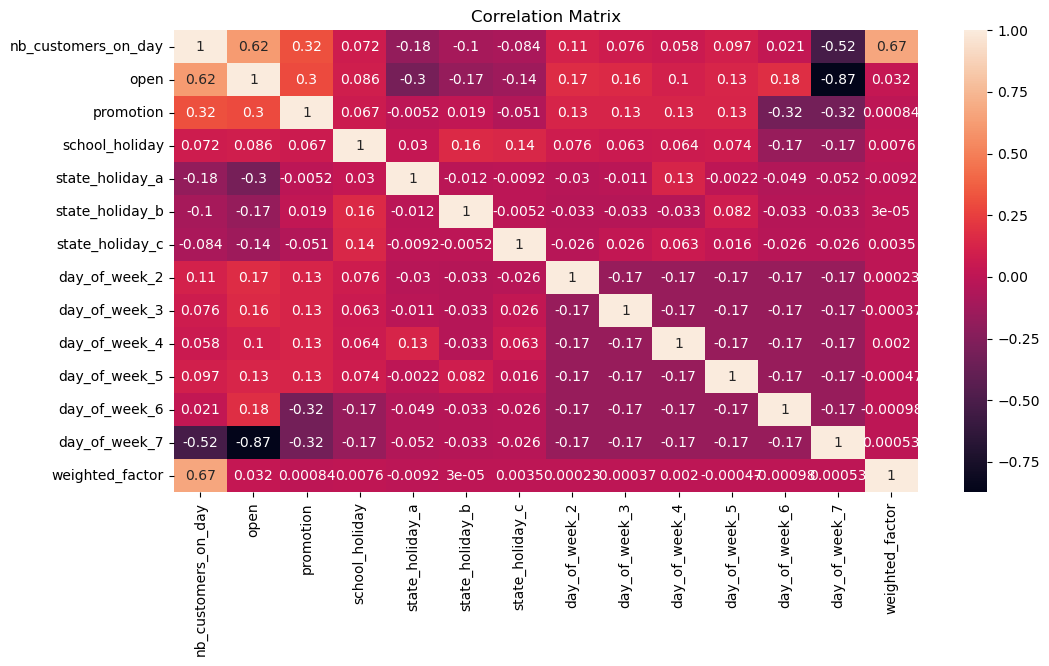

In [7]:
# draw a heatmap of the correlation matrix
corr = X_train.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [111]:
# save weighted factor as csv, since it will be used when predicting the sales
weighted_factor.to_csv('data/weighted_factor.csv')

pandas.core.series.Series

Checking that the new feature was correctly inserted

In [39]:
X_train.head()

,nb_customers_on_day,open,promotion,school_holiday,state_holiday_1,state_holiday_2,state_holiday_3,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,weighted_factor
360184,680,1,1,0,0,0,0,0,1,0,0,0,0,0.288045
162306,1125,1,0,0,0,0,0,0,1,0,0,0,0,0.673788
80802,936,1,1,1,0,0,0,1,0,0,0,0,0,0.342854
607893,938,1,1,1,0,0,0,1,0,0,0,0,0,0.698400
606656,410,1,0,0,0,0,0,0,0,1,0,0,0,0.314986


Now, after splitting the data, we will scale the data using the `StandardScaler()` method. Only the numerical, non-categorical columns will be scaled. That is, the one-hot encoded columns will not be scaled. We scaled the data after splitting it to avoid data leakage. The same scaler applied to the training data will be applied to the test data.

In [40]:
# non category columns
non_category_cols = ['nb_customers_on_day', 'weighted_factor']

# scale the data
scaler = StandardScaler()
X_train[non_category_cols] = scaler.fit_transform(X_train[non_category_cols])
X_test[non_category_cols] = scaler.transform(X_test[non_category_cols])

X_sample = X_train.copy()
X_sample['sales'] = y_train
X_sample = X_sample.sample(frac=0.1, random_state=42)
y_sample = X_sample['sales']
X_sample = X_sample.drop('sales', axis=1)

In [19]:
display(X_train.shape)
display(X_sample.shape)
X_train.head()

(512672, 14)

(51267, 14)

,nb_customers_on_day,open,promotion,school_holiday,state_holiday_1,state_holiday_2,state_holiday_3,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,weighted_factor
360184,0.100176,1,1,0,0,0,0,0,1,0,0,0,0,-0.587281
162306,1.058956,1,0,0,0,0,0,0,1,0,0,0,0,1.076387
80802,0.651744,1,1,1,0,0,0,1,0,0,0,0,0,-0.350897
607893,0.656053,1,1,1,0,0,0,1,0,0,0,0,0,1.182536
606656,-0.481556,1,0,0,0,0,0,0,0,1,0,0,0,-0.471088


## Model Building

### Linear regression

Since this is a regression problem, we will start with the simplest model: Linear Regression. We will use the `LinearRegression()` method from the `sklearn.linear_model` module.

In [41]:
# create linear regression model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train:.2f}")
print(f"R2 score on testing set: {r2_test:.2f}")

R2 score on training set: 0.87
R2 score on testing set: 0.87


In [191]:
# OLS model
import statsmodels.api as sm

X_train_OLS = sm.add_constant(X_train)
X_test_OLS = sm.add_constant(X_test)

ols = sm.OLS(y_train, X_train_OLS).fit()
print(ols.summary())



                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 2.462e+05
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:41:14   Log-Likelihood:            -4.4364e+06
No. Observations:              512672   AIC:                         8.873e+06
Df Residuals:                  512657   BIC:                         8.873e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6192.1410    

In [189]:
# use k-fold cross validation
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
print(scores)

[0.87087961 0.87213801 0.8692342  0.87189518 0.86845813]


#### Model summary
The linear regression consistently obtained an R2 score of 0.87. 

### Desicion Tree

In [45]:
# Desicion tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=9)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train:.2f}")
print(f"R2 score on testing set: {r2_test:.2f}")

R2 score on training set: 0.90
R2 score on testing set: 0.90


In [197]:
# k-fold cross validation
scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
print(scores)

[0.81063757 0.81108255 0.81090491 0.80922169 0.81005662]


In [198]:
# grid search
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [3, 5, 7, 9],
# }

# dt = DecisionTreeRegressor()
# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)

{'max_depth': 9}
0.8960440718669289


In [112]:
# save decision tree as pkl
with open('models/dt.pkl', 'wb') as file:
    pickle.dump(dt, file)

The desicion tree obtained an r2 score between 0.81 to 0.89, depending on the number of max_depth. The higher the max_depth, the higher the r2 score. 

### Random Forest

In [51]:
# Random Forest with grid search
from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 7, 9],
# }

rf = RandomForestRegressor(max_depth=9, n_estimators=200)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train:.2f}")
print(f"R2 score on testing set: {r2_test:.2f}")
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)

R2 score on training set: 0.90
R2 score on testing set: 0.90


In [113]:
# save random forest as pkl
with open('models/rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

81, 
max depth 5: 86, 
max depth 3 n estimator 200: 0.82
max depth 7, n estimator 200: 0.89 

### KN Regressor

In [37]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
# }

# knn = KNeighborsRegressor()
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)


{'n_neighbors': 9}
0.9015690134090694


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [114]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train}")
print(f"R2 score on testing set: {r2_test}")

R2 score on training set: 0.923991977226772
R2 score on testing set: 0.903455527056366


{'n_neighbors': 9}
0.9015690134090694

In [107]:
# save knn model as pkl
with open('models/knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

### SVR

I attempted an SVR model, but it took too long to train and use the search grid, so i cancelled it (took an hour)

In [ ]:
# SVR 
from sklearn.svm import SVR

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3],
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='r2')
grid_search.fit(X_sample, y_sample)

print(grid_search.best_params_)
print(grid_search.best_score_)

So i ran the snippet below (in colab) and obtained an r2 of 0.62

In [ ]:
svr = SVR()
svr.fit(X_sample, y_sample)
y_pred = svr.predict(X_sample)
r2 = r2_score(y_sample, y_pred)
print(f"R2 score is {r2}")

In [ ]:
with open('data/svr model.pkl', 'rb') as f:
    svr = pickle.load(f)

c:\Users\Natanael\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVR from version 1.6.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### NN

In [ ]:
# neural networks
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12, batch_size=128, verbose=1)

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.legend()

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on training set: {r2_train:.2f}")
print(f"R2 score on testing set: {r2_test:.2f}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 6121103.0000 - val_loss: 1713385.6250
Epoch 2/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 3958875.5000 - val_loss: 2033955.5000
Epoch 3/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 3877501.0000 - val_loss: 1771479.8750
Epoch 4/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 3638471.2500 - val_loss: 2217956.7500
Epoch 5/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 3537454.0000 - val_loss: 1845443.6250
Epoch 6/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 3447340.0000 - val_loss: 1761750.7500
Epoch 7/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3345163.2500 - val_loss: 1887369.8750
Epoch 8/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3251041.7500 - val_loss: 1802963.3750
Epoch 9/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 3162304.0000 - val_loss: 1934938.1250
Epoch 10/12
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 3140533.5000 - val_loss: 1

In [63]:
model.save('models/NN_model.keras')

# Predictions

## Import data 
Import data and perform the same preprocessing steps as the training data.

In [ ]:
# open file and save dataframe
real_data = pd.read_csv('data/real_data.csv', sep=';')

# removed unnecessary columns
real_data=real_data.drop(['index', 'date'], axis=1)

# change `state_holiday` strings from 0,a,b,c to ints 0,1,2,3 (did it in pre-processing, so now i need to do it here too)
real_data['state_holiday'] = real_data['state_holiday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})

# one hot encoding
real_data = pd.get_dummies(real_data, columns=['state_holiday', 'day_of_week'], drop_first=True, dtype=int)

# Insert the new feature into the dataset, using the weighted_factor calculated with the training dataset
real_data['weighted_factor'] = real_data['store_ID'].map(weighted_factor)
real_data = real_data.drop('store_ID', axis=1)

# scale the data
real_data[non_category_cols] = scaler.transform(real_data[non_category_cols])

real_data.head()

,nb_customers_on_day,open,promotion,school_holiday,state_holiday_1,state_holiday_2,state_holiday_3,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,weighted_factor
0,-1.364927,0,0,0,0,0,0,0,0,0,0,0,1,-0.630859
1,-1.364927,0,0,0,0,0,0,0,0,0,0,0,1,0.855974
2,0.050621,1,1,0,0,0,0,0,1,0,0,0,0,-0.465635
3,0.492306,1,0,0,0,0,0,1,0,0,0,0,0,0.279007
4,-0.091581,1,1,0,0,0,0,0,1,0,0,0,0,-0.866090


In [84]:
y_test_pred

array([ 9997.45335992,     0.        ,  4419.42356932, ...,
       10639.64909192,  9597.72925787,  7586.45948729])

In [ ]:
# predict with neural network model
model = tf.keras.models.load_model('models/NN_model.keras')
y_real_data_pred = model.predict(real_data)

2226/2226 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [98]:
# y_real_data_pred.sort()
# y_real_data_pred.flatten()

# save to csv
submission = pd.DataFrame()
# submission['index'] = range(1, len(y_real_data_pred)+1)
submission['sales'] = y_real_data_pred.flatten()
submission.to_csv('data/submission_NN.csv', index=False)

submission.head()


,sales
0,0.187224
1,0.187224
2,7009.685059
3,6740.166016
4,6737.082031


In [95]:
real_data.head()

,nb_customers_on_day,open,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,weighted_factor
0,-1.364927,0,0,0,0,0,0,0,0,0,0,0,1,-0.630859
1,-1.364927,0,0,0,0,0,0,0,0,0,0,0,1,0.855974
2,0.050621,1,1,0,0,0,0,0,1,0,0,0,0,-0.465635
3,0.492306,1,0,0,0,0,0,1,0,0,0,0,0,0.279007
4,-0.091581,1,1,0,0,0,0,0,1,0,0,0,0,-0.866090


In [ ]:
y_real_data_pred_knn = knn.predict(real_data)
submission['sales'] = y_real_data_pred_knn
submission.to_csv('data/submission_knn.csv', index=False)
print(y_real_data_pred_knn.min())
submission.head()

0.0


,sales
0,0.000000
1,0.000000
2,7118.888889
3,6825.444444
4,6322.777778


In [103]:
y_real_data_pred_knn.max()

35233.333333333336

In [105]:
new_data = pd.read_csv('data/real_data.csv', sep=';')
new_data['sales'] = y_real_data_pred_knn
new_data.to_csv('data/new_data.csv', index=False, sep=';')